# Batch Gradient Descent With a Single Neuron

*Tue Sep 14, Week 3, Lecture 5*

## Why Python and why Jupyter Notebooks?

- Python is not an ideal langauge for this
- Jupyter is not an ideal environment for htis
- They are, however, in my opinion the **best** we have 

## Notes

- In this example, I am not going to do fancy imports
- I want you to see the layout of torch and torchvision

In [1]:
import torch

In [2]:
torch.rand(5)

tensor([0.9120, 0.5050, 0.3956, 0.9114, 0.9286])

In [3]:
torch.rand(5).shape

torch.Size([5])

In [4]:
torch.rand(5, 25)

tensor([[0.0540, 0.0361, 0.3298, 0.0743, 0.1822, 0.7157, 0.8798, 0.9200, 0.7097,
         0.9226, 0.3338, 0.6951, 0.0884, 0.4920, 0.8780, 0.2848, 0.2800, 0.6815,
         0.9246, 0.2960, 0.1443, 0.0108, 0.2903, 0.4368, 0.4282],
        [0.7610, 0.6589, 0.2155, 0.9144, 0.7985, 0.4448, 0.0974, 0.7450, 0.7397,
         0.1322, 0.5526, 0.3134, 0.4770, 0.9907, 0.5516, 0.1553, 0.3222, 0.4897,
         0.1904, 0.0258, 0.5094, 0.7269, 0.4406, 0.4503, 0.3716],
        [0.4530, 0.6833, 0.7290, 0.6231, 0.1041, 0.5911, 0.7729, 0.9650, 0.7578,
         0.2733, 0.7280, 0.2552, 0.4496, 0.5179, 0.8350, 0.9752, 0.5435, 0.9302,
         0.6577, 0.2068, 0.0260, 0.4826, 0.2520, 0.9339, 0.4559],
        [0.4996, 0.6332, 0.6152, 0.0232, 0.2651, 0.4298, 0.2390, 0.4478, 0.5714,
         0.8041, 0.4059, 0.2356, 0.6228, 0.9070, 0.5065, 0.9406, 0.8910, 0.3987,
         0.5466, 0.0595, 0.8002, 0.6496, 0.2386, 0.9390, 0.7018],
        [0.0770, 0.5473, 0.6662, 0.5145, 0.4932, 0.4074, 0.0254, 0.5376, 0.8150,
       

In [5]:
torch.rand(5, 25).shape

torch.Size([5, 25])

In [6]:
X = torch.rand(5, 12)
Y = torch.rand(12, 16)

In [7]:
X.shape, Y.shape

(torch.Size([5, 12]), torch.Size([12, 16]))

In [8]:
X

tensor([[0.6348, 0.0901, 0.6855, 0.0608, 0.5378, 0.9917, 0.9998, 0.2161, 0.8612,
         0.4646, 0.1605, 0.4146],
        [0.7546, 0.5155, 0.7558, 0.8316, 0.8956, 0.4507, 0.4361, 0.5235, 0.6558,
         0.0711, 0.8133, 0.3804],
        [0.8339, 0.7363, 0.5287, 0.6124, 0.1527, 0.5705, 0.4547, 0.9635, 0.0576,
         0.5325, 0.9929, 0.2997],
        [0.6609, 0.9461, 0.5655, 0.6843, 0.9451, 0.3578, 0.8048, 0.8533, 0.5560,
         0.8390, 0.4376, 0.2681],
        [0.8620, 0.8097, 0.0840, 0.9751, 0.4816, 0.8664, 0.7712, 0.7846, 0.7597,
         0.2826, 0.2602, 0.8233]])

In [9]:
X @ Y

tensor([[4.0370, 2.4348, 2.2828, 3.2892, 2.8226, 3.1621, 3.7073, 3.7979, 2.3162,
         3.3475, 3.8544, 3.0717, 2.6269, 3.0149, 2.9797, 3.0195],
        [4.4480, 2.8453, 3.0292, 3.4466, 3.0640, 3.4669, 4.6764, 3.7691, 2.4932,
         4.3211, 4.6941, 3.8666, 3.4373, 3.5133, 4.0105, 3.3762],
        [4.0296, 3.7872, 2.5899, 3.2901, 2.3836, 3.1732, 4.4185, 3.3020, 2.3271,
         4.7741, 4.4798, 3.7154, 2.4718, 3.4725, 3.9626, 3.0460],
        [5.2747, 3.7831, 3.2387, 4.0184, 3.0905, 4.2749, 5.1195, 3.6655, 3.1372,
         4.9933, 4.7825, 3.7386, 3.4816, 4.0144, 4.6701, 3.9732],
        [4.7898, 3.1772, 3.0323, 3.8919, 2.8792, 3.9583, 5.1986, 3.7774, 2.9512,
         4.5247, 4.4946, 3.5312, 3.2572, 4.1203, 4.0593, 4.1180]])

In [10]:
Z = X @ Y

In [11]:
X.shape, Y.shape

(torch.Size([5, 12]), torch.Size([12, 16]))

In [12]:
Z.shape

torch.Size([5, 16])

In [13]:
Y @ Z

RuntimeError: mat1 and mat2 shapes cannot be multiplied (12x16 and 5x16)

In [14]:
import torchvision

In [15]:
# MNIST : hello world
# EMNIST : extended with letters in addition to digits
# KMNIST : Kuzushiji, Japanese characters
# QMNIST : newer MNIST with better source information

data_path = "../data/"

mnist_transforms = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_dataset = torchvision.datasets.MNIST(
    root=data_path, train=True, download=True, transform=mnist_transforms
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



/opt/mambaforge/envs/cs152/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-pma2oi4d/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [16]:
# batch_size, shuffle
train_loader = torch.utils.data.DataLoader(train_dataset)

In [17]:
image, label = next(iter(train_loader))

In [18]:
image.shape

torch.Size([1, 1, 28, 28])

In [19]:
label.shape, label

(torch.Size([1]), tensor([5]))

In [20]:
import matplotlib.pyplot as plt

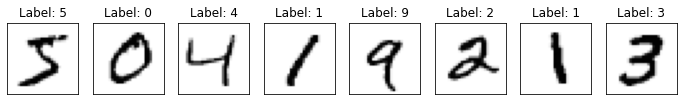

In [21]:
num_to_show = 8

fig, axes = plt.subplots(1, num_to_show, figsize=(12, 12))

for axis, (image, label) in zip(axes, train_loader):
    axis.imshow(image.squeeze(), cmap="Greys")
    axis.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    axis.set_title(f"Label: {label[0]}")

In [22]:
# Simple single neuron model; sometimes called logistic regression

num_pixels = 28 * 28

# Neuron parameters
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

In [23]:
weights.shape, bias.shape, image[0].shape, image[0].view(num_pixels, 1).shape

(torch.Size([784, 1]),
 torch.Size([1]),
 torch.Size([1, 28, 28]),
 torch.Size([784, 1]))

In [24]:
x = image[0]

In [25]:
weights @ x

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 1x784)

In [26]:
x = image[0].view(num_pixels, 1)

In [27]:
weights @ x

RuntimeError: mat1 and mat2 shapes cannot be multiplied (784x1 and 784x1)

In [28]:
weights.T @ x

tensor([[0.4278]])

In [29]:
# from torch import FloatTensor, FloatType


def linear(w, b, x):
    return w.T @ x + b

In [30]:
linear(weights, bias, x)

tensor([[0.4278]])

In [31]:
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

In [32]:
sigmoid(linear(weights, bias, x))

tensor([[0.6053]])

In [33]:
# Get down to two classes (let them pick)

class1 = 7
class2 = 1

idx1 = [i for i, t in enumerate(train_dataset.targets) if t == class1]
idx2 = [i for i, t in enumerate(train_dataset.targets) if t == class2]

idxs = idx1 + idx2
train_size = len(idxs)

train_loader2 = torch.utils.data.DataLoader(
    train_dataset, sampler=torch.utils.data.SubsetRandomSampler(idxs)
)

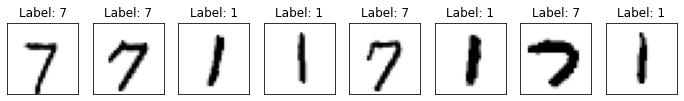

In [34]:
num_to_show = 8

fig, axes = plt.subplots(1, num_to_show, figsize=(12, 12))

for axis, (image, label) in zip(axes, train_loader2):
    axis.imshow(image.squeeze(), cmap="Greys")
    axis.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    axis.set_title(f"Label: {label[0]}")

In [35]:
from time import time

In [36]:
# Optimization, binary cross-entropy loss (Log loss, aka logistic loss or cross-entropy loss)
# defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true

# compare with: subtraction, MSE, abs


def target_to_sigmoid(target):
    new_target = torch.zeros_like(target)
    new_target[target == class1] = 1
    return new_target


# Neuron parameters
num_pixels = 28 * 28
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

num_epochs = 4
learning_rate = 0.01

for epoch in range(num_epochs):

    cost = 0
    weights_derivatives = torch.zeros_like(weights)
    bias_derivative = torch.zeros_like(bias)

    start = time()

    for image, target in train_loader2:

        image = image.view(num_pixels, 1)
        target = target_to_sigmoid(target)

        prediction = sigmoid(linear(weights, bias, image))

        loss = target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction)
        cost -= loss

        dz = prediction - target
        weights_derivatives += image * dz
        bias_derivative += dz.squeeze()

    weights_derivatives /= len(train_loader2)
    bias_derivative /= len(train_loader2)

    weights -= learning_rate * weights_derivatives
    bias -= learning_rate * bias_derivative

    print(
        f"{epoch+1:>2}/{num_epochs}, Cost={cost[0][0]:0.1f}, Time={time()-start:0.1f}s"
    )

 1/10, Cost=8858.2, Time=6.2s
 2/10, Cost=6752.8, Time=6.2s
 3/10, Cost=5462.6, Time=6.3s
 4/10, Cost=4619.1, Time=6.2s
 5/10, Cost=4031.3, Time=6.3s
 6/10, Cost=3599.6, Time=6.3s
 7/10, Cost=3269.2, Time=6.2s
 8/10, Cost=3007.9, Time=6.3s
 9/10, Cost=2795.7, Time=6.3s
10/10, Cost=2619.8, Time=6.3s


In [37]:
# Set the batch size to be equal to the size of the training dataset
train_loader2All = torch.utils.data.DataLoader(
    train_dataset,
    sampler=torch.utils.data.SubsetRandomSampler(idxs),
    batch_size=train_size,
)

In [38]:
# Vectorize (operate on all images at once)

# Neuron parameters
num_pixels = 28 * 28
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

num_epochs = 4
learning_rate = 0.01

for epoch in range(num_epochs):

    weights_derivatives = torch.zeros_like(weights)
    bias_derivative = torch.zeros_like(bias)

    start = time()

    images, targets = next(iter(train_loader2All))
    # print(len(images), images.shape, images.view(train_size, num_pixels))

    images = images.view(train_size, num_pixels)
    targets = target_to_sigmoid(targets)

    predictions = sigmoid(linear(weights, bias, images.T))
    # print(predictions.shape, targets.shape)

    loss = targets * torch.log(predictions) + (1 - targets) * torch.log(1 - predictions)
    cost = -loss.sum()

    dZ = predictions - targets
    weights_derivatives = (1 / train_size) * (dZ @ images)
    bias_derivative = (1 / train_size) * dZ.sum()

    weights -= learning_rate * weights_derivatives.T
    bias -= learning_rate * bias_derivative

    print(f"{epoch+1:>2}/{num_epochs}, Cost={cost:0.1f}, Time={time()-start:0.1f}s")

 1/10, Cost=8370.6, Time=2.6s
 2/10, Cost=6452.7, Time=2.6s
 3/10, Cost=5264.7, Time=2.6s
 4/10, Cost=4479.0, Time=2.6s
 5/10, Cost=3926.1, Time=2.6s
 6/10, Cost=3517.0, Time=2.6s
 7/10, Cost=3202.0, Time=2.6s
 8/10, Cost=2951.7, Time=2.6s
 9/10, Cost=2747.8, Time=2.6s
10/10, Cost=2578.1, Time=2.5s


In [39]:
# Create the validation dataset

valid_dataset = torchvision.datasets.MNIST(
    root=data_path, train=False, download=True, transform=mnist_transforms
)

idx1 = [i for i, t in enumerate(valid_dataset.targets) if t == class1]
idx2 = [i for i, t in enumerate(valid_dataset.targets) if t == class2]

valid_idxs = idx1 + idx2
valid_size = len(valid_idxs)

print(valid_size)

valid_loader2All = torch.utils.data.DataLoader(
    valid_dataset,
    sampler=torch.utils.data.SubsetRandomSampler(valid_idxs),
    batch_size=valid_size,
)

2163


In [40]:
# Add validation metric

# Neuron parameters
num_pixels = 28 * 28
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

num_epochs = 4
learning_rate = 0.01

# Validate with accuracy
valid_images, valid_targets = next(iter(valid_loader2All))
valid_images = valid_images.view(valid_size, num_pixels)
valid_targets = target_to_sigmoid(valid_targets)

valid_predictions = sigmoid(linear(weights, bias, valid_images.T))

accuracy = 1 - (torch.round(valid_predictions) - valid_targets).abs().sum() / valid_size

print(f"Accuracy={accuracy:.2f}")

for epoch in range(num_epochs):

    weights_derivatives = torch.zeros_like(weights)
    bias_derivative = torch.zeros_like(bias)

    start = time()

    images, targets = next(iter(train_loader2All))
    images = images.view(train_size, num_pixels)
    targets = target_to_sigmoid(targets)

    predictions = sigmoid(linear(weights, bias, images.T))

    loss = targets * torch.log(predictions) + (1 - targets) * torch.log(1 - predictions)
    cost = -loss.sum()

    dZ = predictions - targets
    weights_derivatives = (1 / train_size) * (dZ @ images)
    bias_derivative = (1 / train_size) * dZ.sum()

    weights -= learning_rate * weights_derivatives.T
    bias -= learning_rate * bias_derivative

    # Validate with accuracy
    valid_images, valid_targets = next(iter(valid_loader2All))
    valid_images = valid_images.view(valid_size, num_pixels)
    valid_targets = target_to_sigmoid(valid_targets)

    valid_predictions = sigmoid(linear(weights, bias, valid_images.T))

    accuracy = (
        1 - (torch.round(valid_predictions) - valid_targets).abs().sum() / valid_size
    )

    print(
        f"{epoch+1:>2}/{num_epochs}, Cost={cost:0.1f}, Accuracy={accuracy:.2f}, Time={time()-start:0.1f}s"
    )

Accuracy=0.36
 1/10, Cost=9679.5, Accuracy=0.96, Time=3.0s
 2/10, Cost=7198.0, Accuracy=0.96, Time=3.0s
 3/10, Cost=5707.8, Accuracy=0.96, Time=3.0s
 4/10, Cost=4760.8, Accuracy=0.96, Time=3.0s
 5/10, Cost=4116.8, Accuracy=0.97, Time=3.1s
 6/10, Cost=3652.7, Accuracy=0.97, Time=3.0s
 7/10, Cost=3302.5, Accuracy=0.97, Time=3.1s
 8/10, Cost=3028.5, Accuracy=0.97, Time=3.0s
 9/10, Cost=2808.0, Accuracy=0.97, Time=3.0s
10/10, Cost=2626.3, Accuracy=0.97, Time=3.0s


In [41]:
valid_predictions.shape

torch.Size([1, 2163])

In [42]:
valid_targets.shape

torch.Size([2163])

In [43]:
valid_predictions[:10]

tensor([[0.3499, 0.8859, 0.3387,  ..., 0.7963, 0.1725, 0.1090]])

In [44]:
torch.round(valid_predictions)

tensor([[0., 1., 0.,  ..., 1., 0., 0.]])

In [45]:
(torch.round(valid_predictions) - valid_targets).sum()

tensor(-61.)

In [46]:
(torch.round(valid_predictions) - valid_targets).sum()/valid_size

tensor(-0.0282)

In [47]:
1 - (torch.round(valid_predictions) - valid_targets).sum()/valid_size

tensor(1.0282)

In [48]:
x = 1 - (torch.round(valid_predictions) - valid_targets).sum()/valid_size

In [49]:
f"Accuracy={x:.2f}"

'Accuracy=1.03'